## Pricing and Exercise frontier for the American put in the CRR Model

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import pylab

plt.rc('figure', figsize=(18, 8), dpi=100)
from datetime import datetime

# Pricing

In [71]:
def binomialTree(s_0, vol, n, r, T):
    
    #up and down move
    u = np.exp(vol/np.sqrt(n)) 
    d = np.exp(-vol/np.sqrt(n))
    
    #probabilities of up and down move
    q_u = (np.exp(r*T/n) - d)/(u - d)
    q_d = 1.0 - q_u
    
    discount_factor = np.exp(-r * T/n)
    
    St = np.zeros((n+1,n+1))
    St[0,0] = s_0
    
    for i in range(1,n+1):
        
        St[i,0] = round(St[i-1,0]*d, 4)
        for j in range(1,i+1):
            
            St[i,j] = round(St[i-1,j-1]*u, 4)
    
    print ("u = " + str(round(u, 4)))
    print ("d = " + str(round(d, 4)))
    print ("Probability of up move (q_u) = " + str(round(q_u, 4)))
    print ("Probability of down move (q_d) = " + str(round(q_d, 4)))
    print ("")
    
    return (St, u, d, q_u, q_d)

In [72]:
def binomialTreeForOptions(option_type, option_kind, St, K, n, u, d, q_u, q_d):
    
    #Initialize Option Tree
    optionPrice = np.zeros((n+1,n+1))
    
    #Exercise Frontier for Americal Call and American Put initialization
    EPAC = np.zeros((n+1, n+1))
    EPAP = np.zeros((n+1, n+1))

    for j in range(n+1):
        
        if option_kind == "Call":
            optionPrice[n,j] = max(0, St[n,j]-K)
            
            if optionPrice[n,j] > 0:
                EPAC[n, j] = 1
            
        elif option_kind == "Put":
            optionPrice[n,j] = max(0, K-St[n,j])
            
            if optionPrice[n,j] > 0:
                EPAP[n, j] = 1
        
        optionPrice[n,j] = round(optionPrice[n,j], 3)
    
    #Recursive calculation for Option Prices and Exercise Frontier  
    for i in range(n-1,-1,-1):
        
        for j in range(i+1):
            
            if option_type == "American":
                
                if option_kind=="Put":
                    discounted_payoff =  np.exp(-r*T/n)*(q_d*optionPrice[i+1,j]+(q_u)*optionPrice[i+1,j+1])
                    exercise_payoff = max(K - St[i, j], 0)
                    optionPrice[i,j] = max(exercise_payoff, discounted_payoff)
                    
                    if exercise_payoff > discounted_payoff:
                        EPAP[i, j] = 1
                
                elif option_kind=="Call":
                    
                    discounted_payoff =  np.exp(-r*T/n)*(q_d*optionPrice[i+1,j]+(q_u)*optionPrice[i+1,j+1])
                    exercise_payoff = max(St[i, j] - K, 0)
                    optionPrice[i,j] = max(exercise_payoff, discounted_payoff)
                    
                    if exercise_payoff > discounted_payoff:
                        EPAC[i, j] = 1
                    
                    
            
            elif option_type == "European":
                
                if option_kind=="Put":
                    optionPrice[i,j] = (np.exp(-r*T/n)*(q_d*optionPrice[i+1,j]+(q_u)*optionPrice[i+1,j+1]))
                
                elif option_kind=="Call":
                    optionPrice[i,j] = (np.exp(-r*T/n)*(q_d*optionPrice[i+1,j]+(q_u)*optionPrice[i+1,j+1]))
                    
            optionPrice[i,j] = round(optionPrice[i,j], 3)
    
    return (optionPrice, EPAP, EPAC)
        
        

In [73]:
def visualizeBinomialTree(St, type_):
    
    print ("CRR Model for " + type_ + " Price visualization\n")

    for i in range(n+1):
        price = list()
        for j in range(i+1):
            
            price.append(St[i, j])
        
        if i == 0:
            print ("t=" + str(i) + " " + str(price) + " -> Price Today derived using the Risk Neutral Measure")
        else:
            print ("t=" + str(i) + " " + str(price))
    print ()

In [89]:
#Initialize Parameters (change r = 0 to solve the 3rd problem)
s_0 = 100.0
volatility = 0.1
n = 10
r = 0.09
T = 1
K = 100


(St, u, d, q_u, q_d) = binomialTree(s_0, volatility, n, r, T)
visualizeBinomialTree(St, "Stock")
optionPrice, EPAP, EPAC = binomialTreeForOptions("European", "Call", St, K, n, u, d, q_u, q_d)
visualizeBinomialTree(optionPrice, "European Call Option")

optionPrice, EPAP, EPAC = binomialTreeForOptions("European", "Put", St, K, n, u, d, q_u, q_d)
visualizeBinomialTree(optionPrice, "European Put Option")

optionPrice, EPAP, EPAC = binomialTreeForOptions("American", "Call", St, K, n, u, d, q_u, q_d)
visualizeBinomialTree(optionPrice, "American Call Option")

optionPrice, EPAP, EPAC = binomialTreeForOptions("American", "Put", St, K, n, u, d, q_u, q_d)
visualizeBinomialTree(optionPrice, "American Put Option")
    

u = 1.0321
d = 0.9689
Probability of up move (q_u) = 0.635
Probability of down move (q_d) = 0.365

CRR Model for Stock Price visualization

t=0 [100.0] -> Price Today derived using the Risk Neutral Measure
t=1 [96.8872, 103.2128]
t=2 [93.8713, 100.0, 106.5288]
t=3 [90.9493, 96.8872, 103.2128, 109.9514]
t=4 [88.1182, 93.8713, 100.0, 106.5288, 113.4839]
t=5 [85.3753, 90.9493, 96.8872, 103.2128, 109.9514, 117.1299]
t=6 [82.7177, 88.1182, 93.8713, 100.0, 106.5288, 113.4839, 120.8931]
t=7 [80.1429, 85.3753, 90.9493, 96.8872, 103.2128, 109.9514, 117.1299, 124.7772]
t=8 [77.6482, 82.7177, 88.1182, 93.8713, 100.0, 106.5288, 113.4839, 120.8931, 128.7861]
t=9 [75.2312, 80.1429, 85.3753, 90.9493, 96.8872, 103.2128, 109.9514, 117.1299, 124.7772, 132.9238]
t=10 [72.8894, 77.6482, 82.7177, 88.1182, 93.8713, 100.0, 106.5288, 113.4839, 120.8931, 128.7861, 137.1944]

CRR Model for European Call Option Price visualization

t=0 [9.454] -> Price Today derived using the Risk Neutral Measure
t=1 [6.215, 11.

u = 1.0184
d = 0.9819
Probability of up move (q_u) = 0.5777
Probability of down move (q_d) = 0.4223



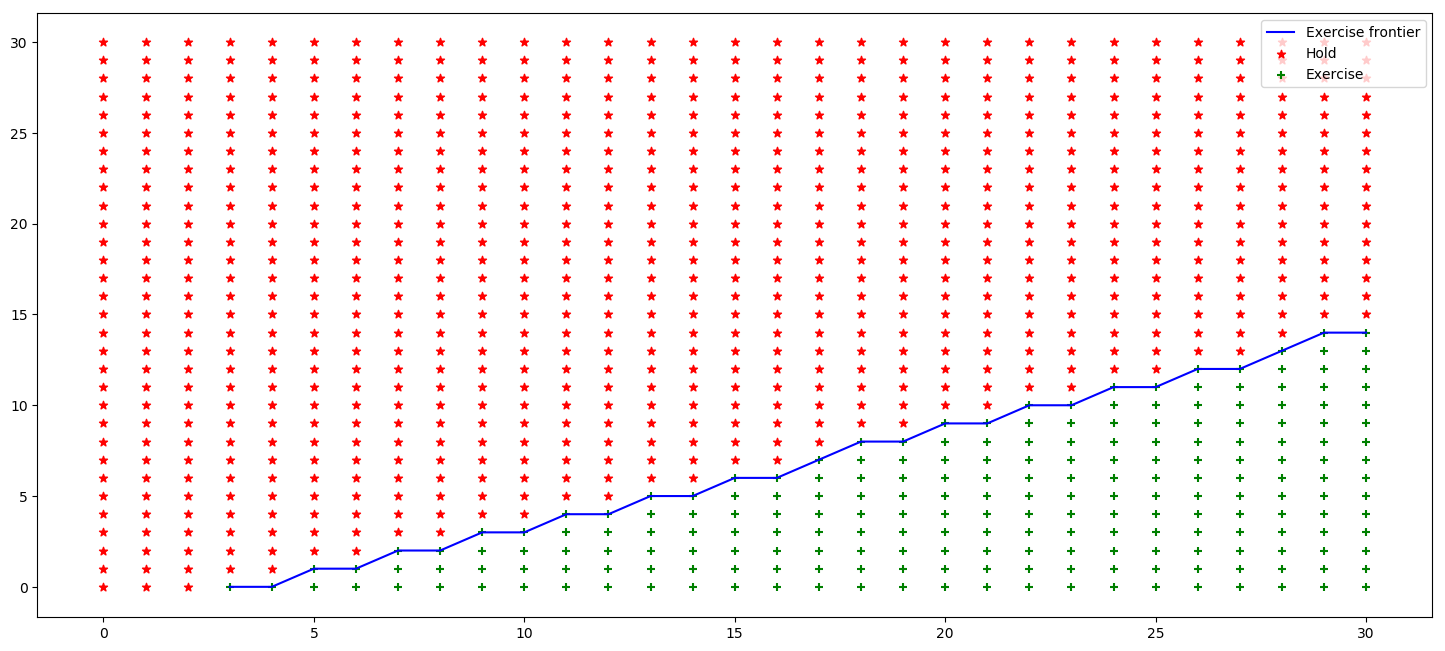

In [97]:
#Plot for Exercise Frontiers of American Put

n = 30 #changing the no of period in the model to 30
(St, u, d, q_u, q_d) = binomialTree(s_0, volatility, n, r, T)
optionPrice, EPAP, EPAC = binomialTreeForOptions("American", "Put", St, K, n, u, d, q_u, q_d)
#print (EPAP)
exercise_x = []
exercise_y = []
no_exercise_x = []
no_exercise_y = []


for i in range(n+1):
       for j in range(n+1):
            if(EPAP[i][j] == 0):
                no_exercise_x.append(i)
                no_exercise_y.append(j)
            
            else:
                exercise_x.append(i)
                exercise_y.append(j)

                
top_ones_x = []
top_ones_y = []
for i in range(n, -1, -1):
    for j in range(n, -1, -1):
        if(EPAP[i][j]==1):
            top_ones_x.append(j)
            top_ones_y.append(i)
            break
            


pylab.plot(top_ones_y,top_ones_x,'-b',label='Exercise frontier')
zero=plt.scatter((no_exercise_x),(no_exercise_y), marker='*', c='r',label='Hold')
one=plt.scatter((exercise_x),(exercise_y), marker='+', c='g',label='Exercise')
plt.legend((one,zero),('Exercise', 'Hold/expire'),numpoints=1, loc='upper right', bbox_to_anchor=(1.5, 1.5), ncol=2, fontsize=20)
plt.legend()
plt.show()

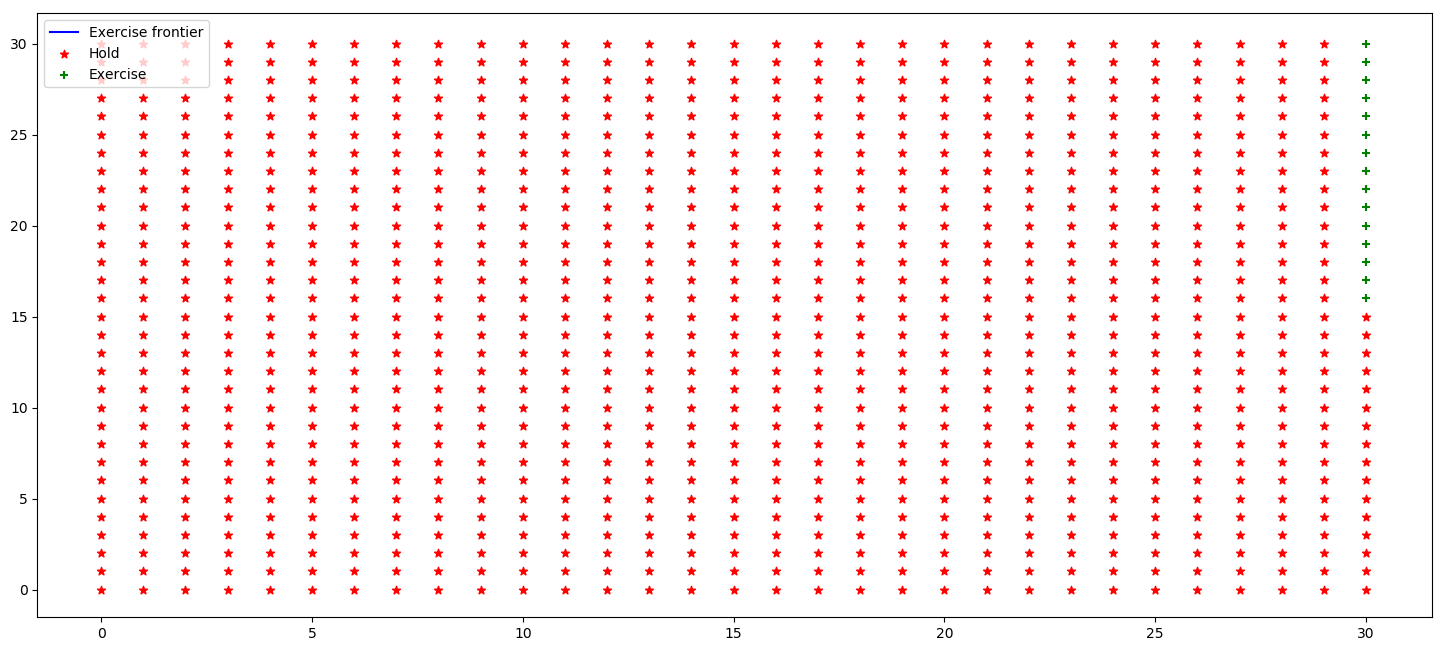

In [98]:
#Plot for Exercise Frontiers of American Call

optionPrice, EPAP, EPAC = binomialTreeForOptions("American", "Call", St, K, n, u, d, q_u, q_d)
#print (EPAC)
exercise_x = []
exercise_y = []
no_exercise_x = []
no_exercise_y = []


for i in range(n+1):
       for j in range(n+1):
            if(EPAC[i][j] == 0):
                no_exercise_x.append(i)
                no_exercise_y.append(j)
            
            else:
                exercise_x.append(i)
                exercise_y.append(j)

                
top_ones_x = []
top_ones_y = []
for i in range(n, -1, -1):
    for j in range(n, -1, -1):
        if(EPAC[i][j]==1):
            top_ones_x.append(j)
            top_ones_y.append(i)
            break
            


pylab.plot(top_ones_y,top_ones_x,'-b',label='Exercise frontier')
zero=plt.scatter((no_exercise_x),(no_exercise_y), marker='*', c='r',label='Hold')
one=plt.scatter((exercise_x),(exercise_y), marker='+', c='g',label='Exercise')
plt.legend((one,zero),('Exercise', 'Hold/expire'),numpoints=1, loc='upper right', bbox_to_anchor=(1.5, 1.5), ncol=2, fontsize=20)
plt.legend()
plt.show()